data Description


In [33]:
import pandas as pd

df = pd.read_csv('data.csv')

print(df.info())
print(df.head())
print('null_count = ',df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9453 entries, 0 to 9452
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quote        9453 non-null   object
 1   class        9453 non-null   object
 2   good_or_bad  9453 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 221.7+ KB
None
                                               quote                class  \
0                            أقوال وحكم عن عمل الخير  اﻹحسان إلىِ الغَيرُ   
1                                  حكمة عن عمل الخير  اﻹحسان إلىِ الغَيرُ   
2            إن الأبطال حقا قوم يفعلون الخير في صمت.  اﻹحسان إلىِ الغَيرُ   
3  اخرج إلى العالم وكن إنسانا جيدا، والأهم أن تخر...  اﻹحسان إلىِ الغَيرُ   
4  لا تنس أنّ الناس يتذكرون دائمًا فعلك للخير وصن...  اﻹحسان إلىِ الغَيرُ   

   good_or_bad  
0            0  
1            0  
2            0  
3            0  
4            0  
null_count =  quote          0
class          0
good_or_bad    0
dt

C:\Users\ahmed\AppData\Local\Temp\ipykernel_19032\3483849983.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\ahmed\AppData\Local\Temp\ipykernel_19032\3483849983.py:36: UserWarning: Glyph 64609 (\N{ARABIC LIGATURE SHADDA WITH DAMMA ISOLATED FORM}) missing from current font.
  plt.tight_layout()
C:\Users\ahmed\AppData\Local\Temp\ipykernel_19032\3483849983.py:39: UserWarning: Glyph 64609 (\N{ARABIC LIGATURE SHADDA WITH DAMMA ISOLATED FORM}) missing from current font.
  plt.savefig('class_distribution_with_counts.svg', format='svg', bbox_inches='tight')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_19032\3483849983.py:40: UserWarning: Glyph 64609 (\N{ARABIC LIGATURE SHADDA WITH DAMMA ISOLATED FORM}) missing from current font.
  plt.savefig('class_distribution_with_counts.pdf', format='pdf', bbox_inches='tight')
C:\Users\a

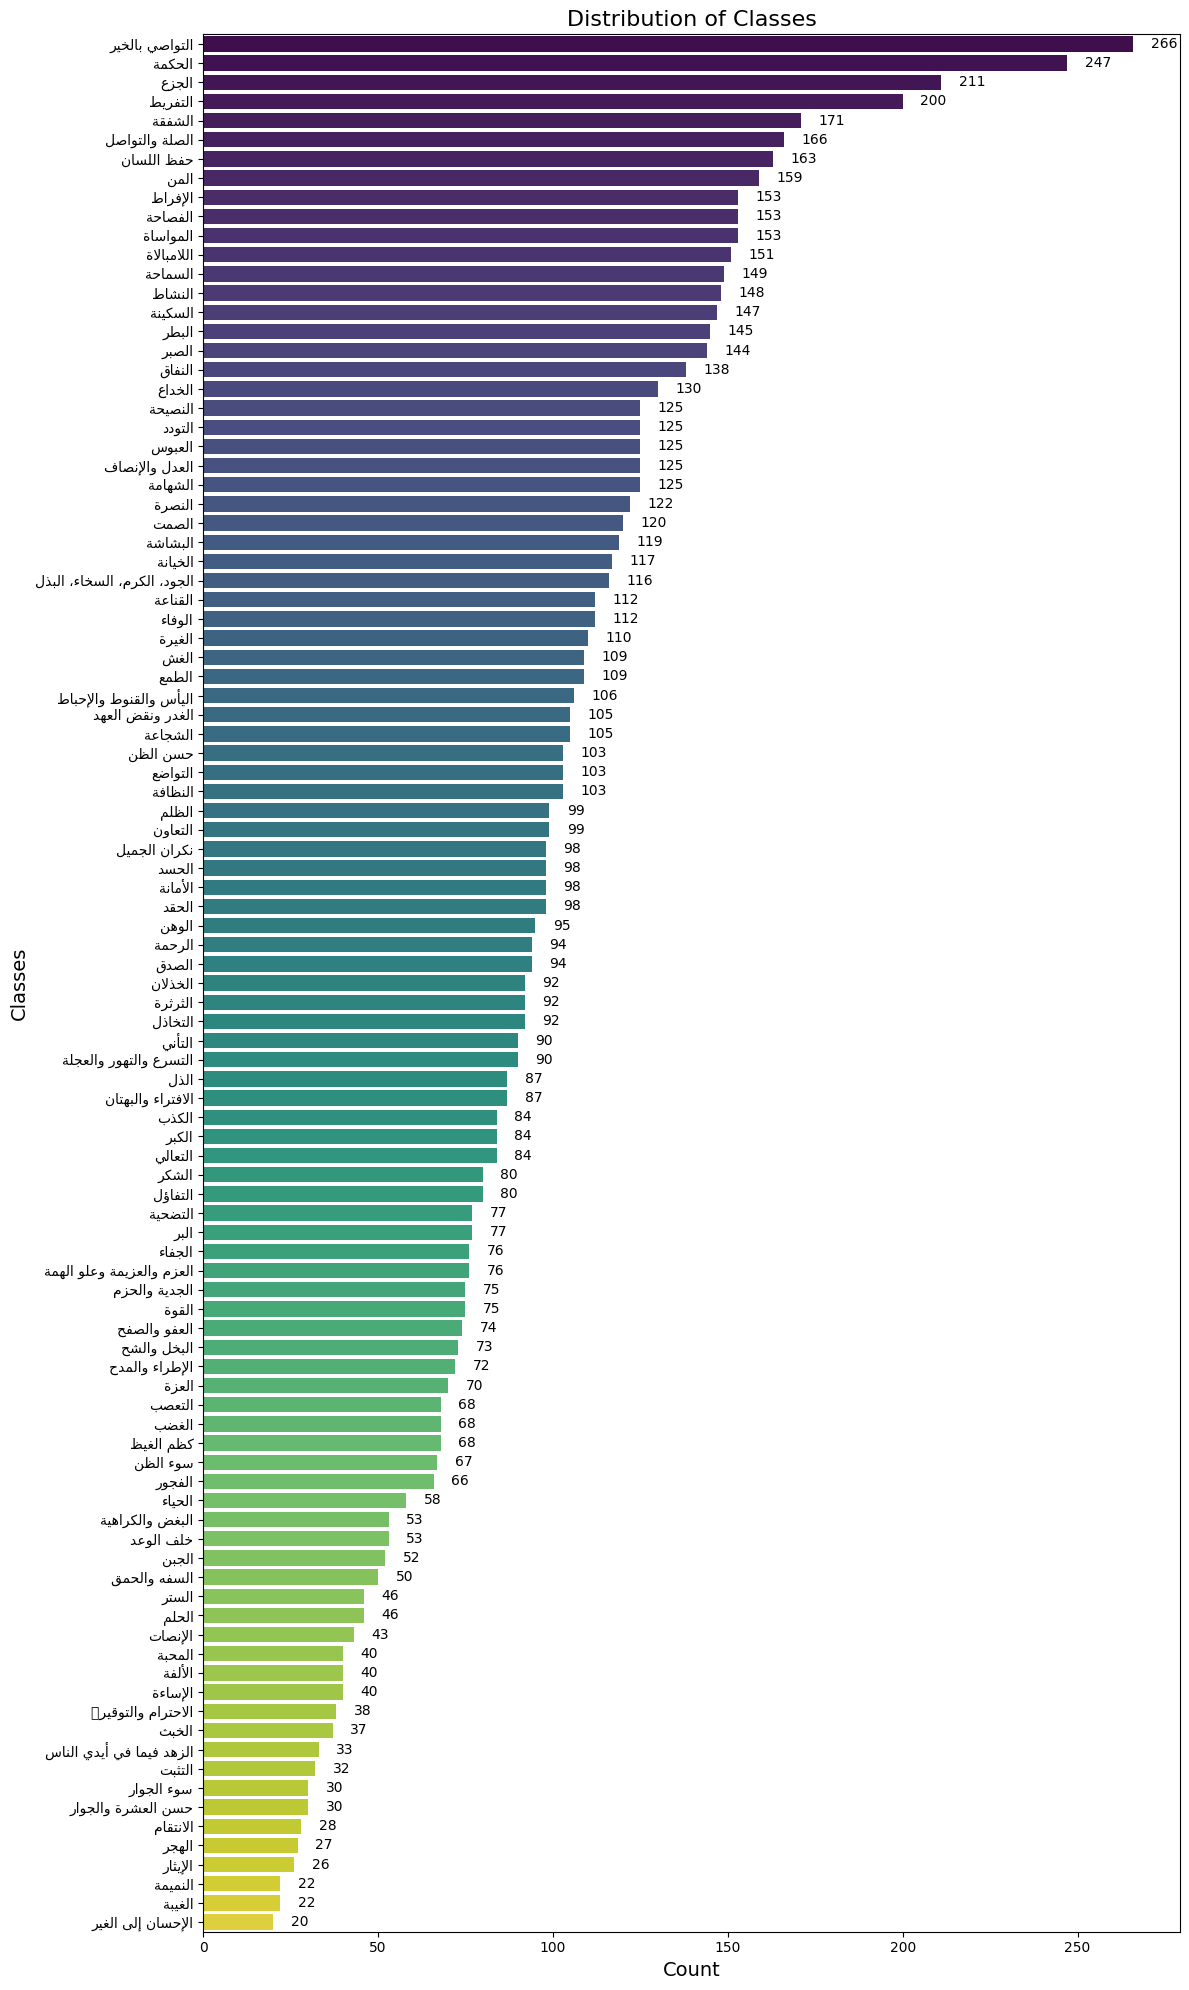

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Reshape and reorder Arabic class names
df['reshaped_classe'] = df['class'].apply(
    lambda x: get_display(arabic_reshaper.reshape(x))
)

# Plot the class distribution
plt.figure(figsize=(12, 20))  # Increase the height for better readability
ax = sns.countplot(
    y='reshaped_classe',
    data=df,
    order=df['reshaped_classe'].value_counts().index,
    palette='viridis'
)

# Add the count text to each bar
for p in ax.patches:
    count = int(p.get_width())  # Get the count value
    ax.text(
        p.get_width() + 5,  # Position to the right of the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the text
        f'{count}',  # The count as a string
        va='center',  # Align vertically to the center
        fontsize=10,  # Text size
        color='black'  # Text color
    )

# Title and labels
plt.title('Distribution of Classes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.tight_layout()

# Save the visualization
plt.savefig('class_distribution.pdf', format='pdf', bbox_inches='tight')

plt.show()


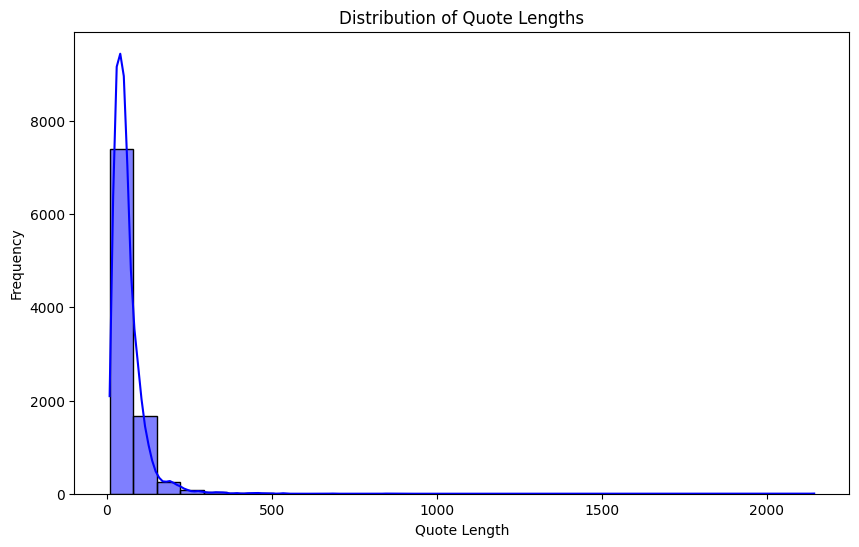

In [11]:
# Add a new column for quote length
df['quote_length'] = df['quote'].apply(len)

# Plot distribution of quote lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['quote_length'], kde=True, bins=30, color='blue')
plt.title("Distribution of Quote Lengths")
plt.xlabel("Quote Length")
plt.ylabel("Frequency")
plt.show()


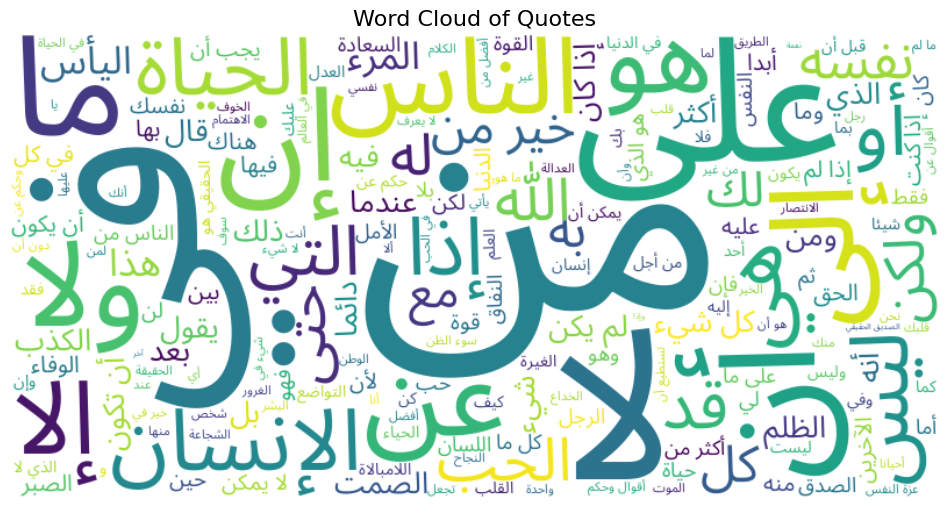

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Reshape and reorder Arabic text for proper display
all_words = ' '.join(df['quote'])
reshaped_text = arabic_reshaper.reshape(all_words)  # Fix Arabic shaping
bidi_text = get_display(reshaped_text)  # Fix text direction

# Generate the word cloud
wordcloud = WordCloud(
    font_path='NotoSansArabic-VariableFont_wdth,wght.ttf',  # Replace with your font
    background_color='white',
    width=800,
    height=400
).generate(bidi_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Quotes', fontsize=16)
plt.show()


Data preparation

In [32]:
#eleminate stop wolds 

stop_words=["فى","في","كل","لم","لن","له","من","هو","هي","قوة","كما","لها","منذ","وقد","ولا","نفسه","لقاء","مقابل","هناك","وقال","وكان","نهاية","وقالت","وكانت","للامم","فيه","كلم","لكن","وفي","وقف","ولم","ومن","وهو","وهي","يوم","فيها","منها","مليار","لوكالة","يكون","يمكن","مليون","حيث","اكد","الا","اما","امس","السابق","التى","التي","اكثر","ايار","ايضا","ثلاثة","الذاتي","الاخيرة","الثاني","الثانية","الذى","الذي","الان","امام","ايام","خلال","حوالى","الذين","الاول","الاولى","بين","ذلك","دون","حول","حين","الف","الى","انه","اول","ضمن","انها","جميع","الماضي","الوقت","المقبل","اليوم","ـ","ف","و","و6","قد","لا","ما","مع","مساء","هذا","واحد","واضاف","واضافت","فان","قبل","قال","كان","لدى","نحو","هذه","وان","واكد","كانت","واوضح","مايو","ب","ا","أ","،","عشر","عدد","عدة","عشرة","عدم","عام","عاما","عن","عند","عندما","على","عليه","عليها","زيارة","سنة","سنوات","تم","ضد","بعد","بعض","اعادة","اعلنت","بسبب","حتى","اذا","احد","اثر","برس","باسم","غدا","شخصا","صباح","اطار","اربعة","اخرى","بان","اجل","غير","بشكل","حاليا","بن","به","ثم","اف","ان","او","اي","بها","صفر"]

print(stop_words)

['فى', 'في', 'كل', 'لم', 'لن', 'له', 'من', 'هو', 'هي', 'قوة', 'كما', 'لها', 'منذ', 'وقد', 'ولا', 'نفسه', 'لقاء', 'مقابل', 'هناك', 'وقال', 'وكان', 'نهاية', 'وقالت', 'وكانت', 'للامم', 'فيه', 'كلم', 'لكن', 'وفي', 'وقف', 'ولم', 'ومن', 'وهو', 'وهي', 'يوم', 'فيها', 'منها', 'مليار', 'لوكالة', 'يكون', 'يمكن', 'مليون', 'حيث', 'اكد', 'الا', 'اما', 'امس', 'السابق', 'التى', 'التي', 'اكثر', 'ايار', 'ايضا', 'ثلاثة', 'الذاتي', 'الاخيرة', 'الثاني', 'الثانية', 'الذى', 'الذي', 'الان', 'امام', 'ايام', 'خلال', 'حوالى', 'الذين', 'الاول', 'الاولى', 'بين', 'ذلك', 'دون', 'حول', 'حين', 'الف', 'الى', 'انه', 'اول', 'ضمن', 'انها', 'جميع', 'الماضي', 'الوقت', 'المقبل', 'اليوم', 'ـ', 'ف', 'و', 'و6', 'قد', 'لا', 'ما', 'مع', 'مساء', 'هذا', 'واحد', 'واضاف', 'واضافت', 'فان', 'قبل', 'قال', 'كان', 'لدى', 'نحو', 'هذه', 'وان', 'واكد', 'كانت', 'واوضح', 'مايو', 'ب', 'ا', 'أ', '،', 'عشر', 'عدد', 'عدة', 'عشرة', 'عدم', 'عام', 'عاما', 'عن', 'عند', 'عندما', 'على', 'عليه', 'عليها', 'زيارة', 'سنة', 'سنوات', 'تم', 'ضد', 'بعد', 'بعض',

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words("arabic"))
stemmer = ISRIStemmer()

def process_quotes(text):
    tokens = re.findall(r'\b\w+\b', text) 
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens if word]
    return ' '.join(tokens)

df_no_stopw = df.copy()
df_no_stopw["quote"] = df_no_stopw["quote"].apply(process_quotes)

df_no_stopw.to_csv('df_no_stopw.csv', index=True, encoding='utf-8-sig')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
